In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('rainfall.csv')
df['Date'] = pd.to_datetime(df['Date']).dt.strftime("%d-%m-%Y")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df
print('Shape: ',df.shape)
df.head()

Shape:  (3625, 1)


,Rain
Date,
2011-01-01,3231
2011-01-02,3231
2011-01-03,3231
2011-01-04,3231
2011-01-05,3231


In [4]:
df['Rain']

Date
2011-01-01    3231
2011-01-02    3231
2011-01-03    3231
2011-01-04    3231
2011-01-05    3231
              ... 
2020-11-29    2814
2020-11-30    2848
2020-12-01    2902
2020-12-02    2873
2020-12-03    2867
Name: Rain, Length: 3625, dtype: int64

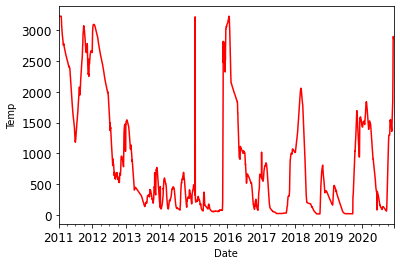

In [5]:
df['Rain'].plot(fontsize=12, color='r',ylabel='Temp')
plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('1. ADF: ',dftest[0])
    print('2. p-value: ',dftest[1])
    print('3. No. of lags: ',dftest[2])
    print('4. No. of observations used for ADF regression and critical values calculation: ',dftest[3])
    print('5. Critical Values: ')
    for key, val in dftest[4].items():
        print('\t',key,': ',val)

In [7]:
ad_test(df['Rain'])

1. ADF:  -2.9005704800947982
2. p-value:  0.045281698606336025
3. No. of lags:  8
4. No. of observations used for ADF regression and critical values calculation:  3616
5. Critical Values: 
	 1% :  -3.432159720193857
	 5% :  -2.862339633287972
	 10% :  -2.56719565730786


In [8]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

In [9]:
stepwise_fit=auto_arima(df['Rain'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=41262.712, Time=2.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=41852.754, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=41423.845, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=41469.301, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=41850.760, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=41260.859, Time=1.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=41385.002, Time=0.66 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=41422.573, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=41262.691, Time=2.02 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=41328.348, Time=0.52 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=41415.485, Time=0.90 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=41264.802, Time=2.92 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=41258.860, Time=0.78 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=41383.013, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3625
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -20625.430
Date:                Mon, 19 Jul 2021   AIC                          41258.860
Time:                        16:11:37   BIC                          41283.642
Sample:                             0   HQIC                         41267.689
                               - 3625                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8049      0.013     61.353      0.000       0.779       0.831
ma.L1         -1.1844      0.013    -90.645      0.000      -1.210      -1.159
ma.L2          0.4143      0.005     90.533      0.000       0.405       0.423
sigma2      5139.3727      6.175    832.293      0.000    5127.270    5151.475
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):         117018429.96
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            13.85
Prob(H) (two-sided):                  0.28   Kurtosis:                       882.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,train.shape)

(3625, 1)
(3595, 1) (3595, 1)


In [12]:
model=ARIMA(train['Rain'],order=(1,1,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rain   No. Observations:                 3594
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -20412.440
Method:                       css-mle   S.D. of innovations             70.853
Date:                Mon, 19 Jul 2021   AIC                          40834.881
Time:                        16:11:38   BIC                          40865.816
Sample:                    01-02-2011   HQIC                         40845.906
                         - 11-03-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4754      1.325     -0.359      0.720      -3.073       2.122
ar.L1.D.Rain     0.7884      0.033     23.701      0.000       0.723       0.854
ma.L1.D.Rain    -1.1922      0.032    -37.548      0.000      -1.254      -1.130
ma.L2.D.Rain     0.4296      0.015     28.261      0.000       0.400       0.459
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2684           +0.0000j            1.2684            0.0000
MA.1            1.3876           -0.6344j            1.5257           -0.0683
MA.2            1.3876           +0.6344j            1.5257            0.0683
-----------------------------------------------------------------------------
"""

In [13]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

Date
2020-11-04    1532.123640
2020-11-05    1529.526365
2020-11-06    1527.378046
2020-11-07    1525.583689
2020-11-08    1524.068403
2020-11-09    1522.773141
2020-11-10    1521.651349
2020-11-11    1520.666323
2020-11-12    1519.789127
2020-11-13    1518.996944
2020-11-14    1518.271789
2020-11-15    1517.599478
2020-11-16    1516.968831
2020-11-17    1516.371032
2020-11-18    1515.799131
2020-11-19    1515.247649
2020-11-20    1514.712265
2020-11-21    1514.189574
2020-11-22    1513.676889
2020-11-23    1513.172093
2020-11-24    1512.673518
2020-11-25    1512.179847
2020-11-26    1511.690042
2020-11-27    1511.203286
2020-11-28    1510.718932
2020-11-29    1510.236474
2020-11-30    1509.755510
2020-12-01    1509.275724
2020-12-02    1508.796866
2020-12-03    1508.318741
dtype: float64


<AxesSubplot:xlabel='Date'>

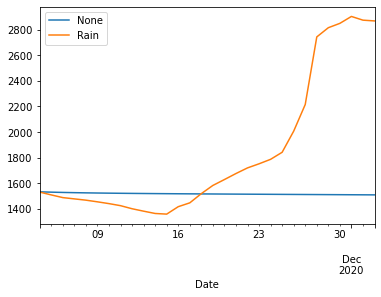

In [14]:
pred.plot(legend=True)
test['Rain'].plot(legend=True)

In [15]:
test['Rain'].mean()

1830.5666666666666

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Rain']))
print(rmse)

628.3057624759057


In [17]:
model2=ARIMA(df['Rain'],order=(1,1,2))
model2=model2.fit()
df.tail()

,Rain
Date,
2020-11-29,2814
2020-11-30,2848
2020-12-01,2902
2020-12-02,2873
2020-12-03,2867


In [18]:
index_future_dates=pd.date_range(start='2020-12-03',end='2020-12-31')
pred=model2.predict(start=len(df),end=len(df)+28,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2020-12-03    2955.968776
2020-12-04    2974.248523
2020-12-05    2988.950838
2020-12-06    3000.773950
2020-12-07    3010.279812
2020-12-08    3017.920696
2020-12-09    3024.060601
2020-12-10    3028.992483
2020-12-11    3032.952119
2020-12-12    3036.129269
2020-12-13    3038.676654
2020-12-14    3040.717191
2020-12-15    3042.349804
2020-12-16    3043.654110
2020-12-17    3044.694187
2020-12-18    3045.521606
2020-12-19    3046.177872
2020-12-20    3046.696392
2020-12-21    3047.104049
2020-12-22    3047.422481
2020-12-23    3047.669103
2020-12-24    3047.857931
2020-12-25    3048.000245
2020-12-26    3048.105122
2020-12-27    3048.179870
2020-12-28    3048.230370
2020-12-29    3048.261354
2020-12-30    3048.276630
2020-12-31    3048.279266
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='Date', ylabel='Close'>

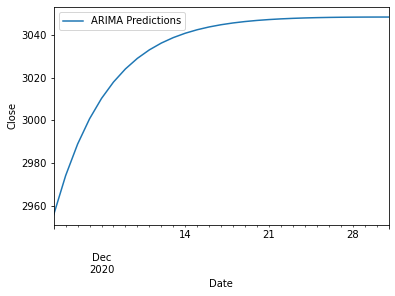

In [19]:
pred.plot(legend=True,xlabel='Date',ylabel='Close')